In [1]:
import torch

import matplotlib.pyplot as plt

from muutils.nbutils.configure_notebook import configure_notebook

from maze_dataset import MazeDataset, MazeDatasetConfig, LatticeMazeGenerators
from maze_dataset.plotting import MazePlot, PathFormat

from maze_transformer.training.config import ZanjHookedTransformer
from maze_transformer.evaluation.load_model_testdata import load_model_with_test_data
from maze_transformer.evaluation.plotting import plot_predicted_paths


In [2]:
# Setup (we won't be training any models)
SEED: int = 46
DEVICE: torch.device = configure_notebook(seed=SEED, dark_mode=False)
print(f"{DEVICE = }")
torch.set_grad_enabled(False)

set up plots with PLOT_MODE = 'inline', FIG_OUTPUT_FMT = None, FIG_BASEPATH = None
DEVICE = device(type='cuda')


In [3]:
N_MAZES: int = 64
MODEL: ZanjHookedTransformer; DATASET: MazeDataset
MODEL, DATASET = load_model_with_test_data(
	model_path="../models/wandb.jerpkipj.zanj",
	# model_path="../examples/model.hallway-insto.final.zanj",
	# model_path="../examples/model.hallway-jvq.final.zanj",
	# dataset_cfg_source=None,
	dataset_cfg_source=MazeDatasetConfig(
		name="default",
		grid_n=7,
		n_mazes=N_MAZES,
		maze_ctor=LatticeMazeGenerators.gen_dfs,
		maze_ctor_kwargs=dict(do_forks=False),
		seed=SEED,
		applied_filters=[{'name': 'path_length', 'args': (), 'kwargs': {"min_length": 6}}],
	),
	n_examples=50,
)

F:\KNC\maze-dataset\maze_dataset\dataset\dataset.py:61: UserWarning:

in GPTDatasetConfig self.name='default', self.seed=46 is trying to override GLOBAL_SEED=42 which has already been changed elsewhere from DEFAULT_SEED=42



loaded model with 9.6M params (num_params = 9639484) from:
	path: ../models/wandb.jerpkipj.zanj
	original model name: 'model.zanj_model_config.name = 'default'', changing to 'jerpkipj'
	model tensors on devices: {device(type='cuda', index=0)}
loaded dataset with 38 examples
dataset.cfg.summary() = {'name': 'default', 'fname': 'default-g7-n38-a_dfs-h69578', 'sdc_hash': 75663732861677388920675524037447463141427699761818146612421580092655787969578, 'seed': 46, 'seq_len_min': 1, 'seq_len_max': 512, 'applied_filters': [{'name': 'path_length', 'args': [], 'kwargs': {'min_length': 6}}], 'grid_n': 7, 'grid_shape': (7, 7), 'n_mazes': 38, 'maze_ctor_name': 'gen_dfs', 'maze_ctor_kwargs': {'do_forks': False}}


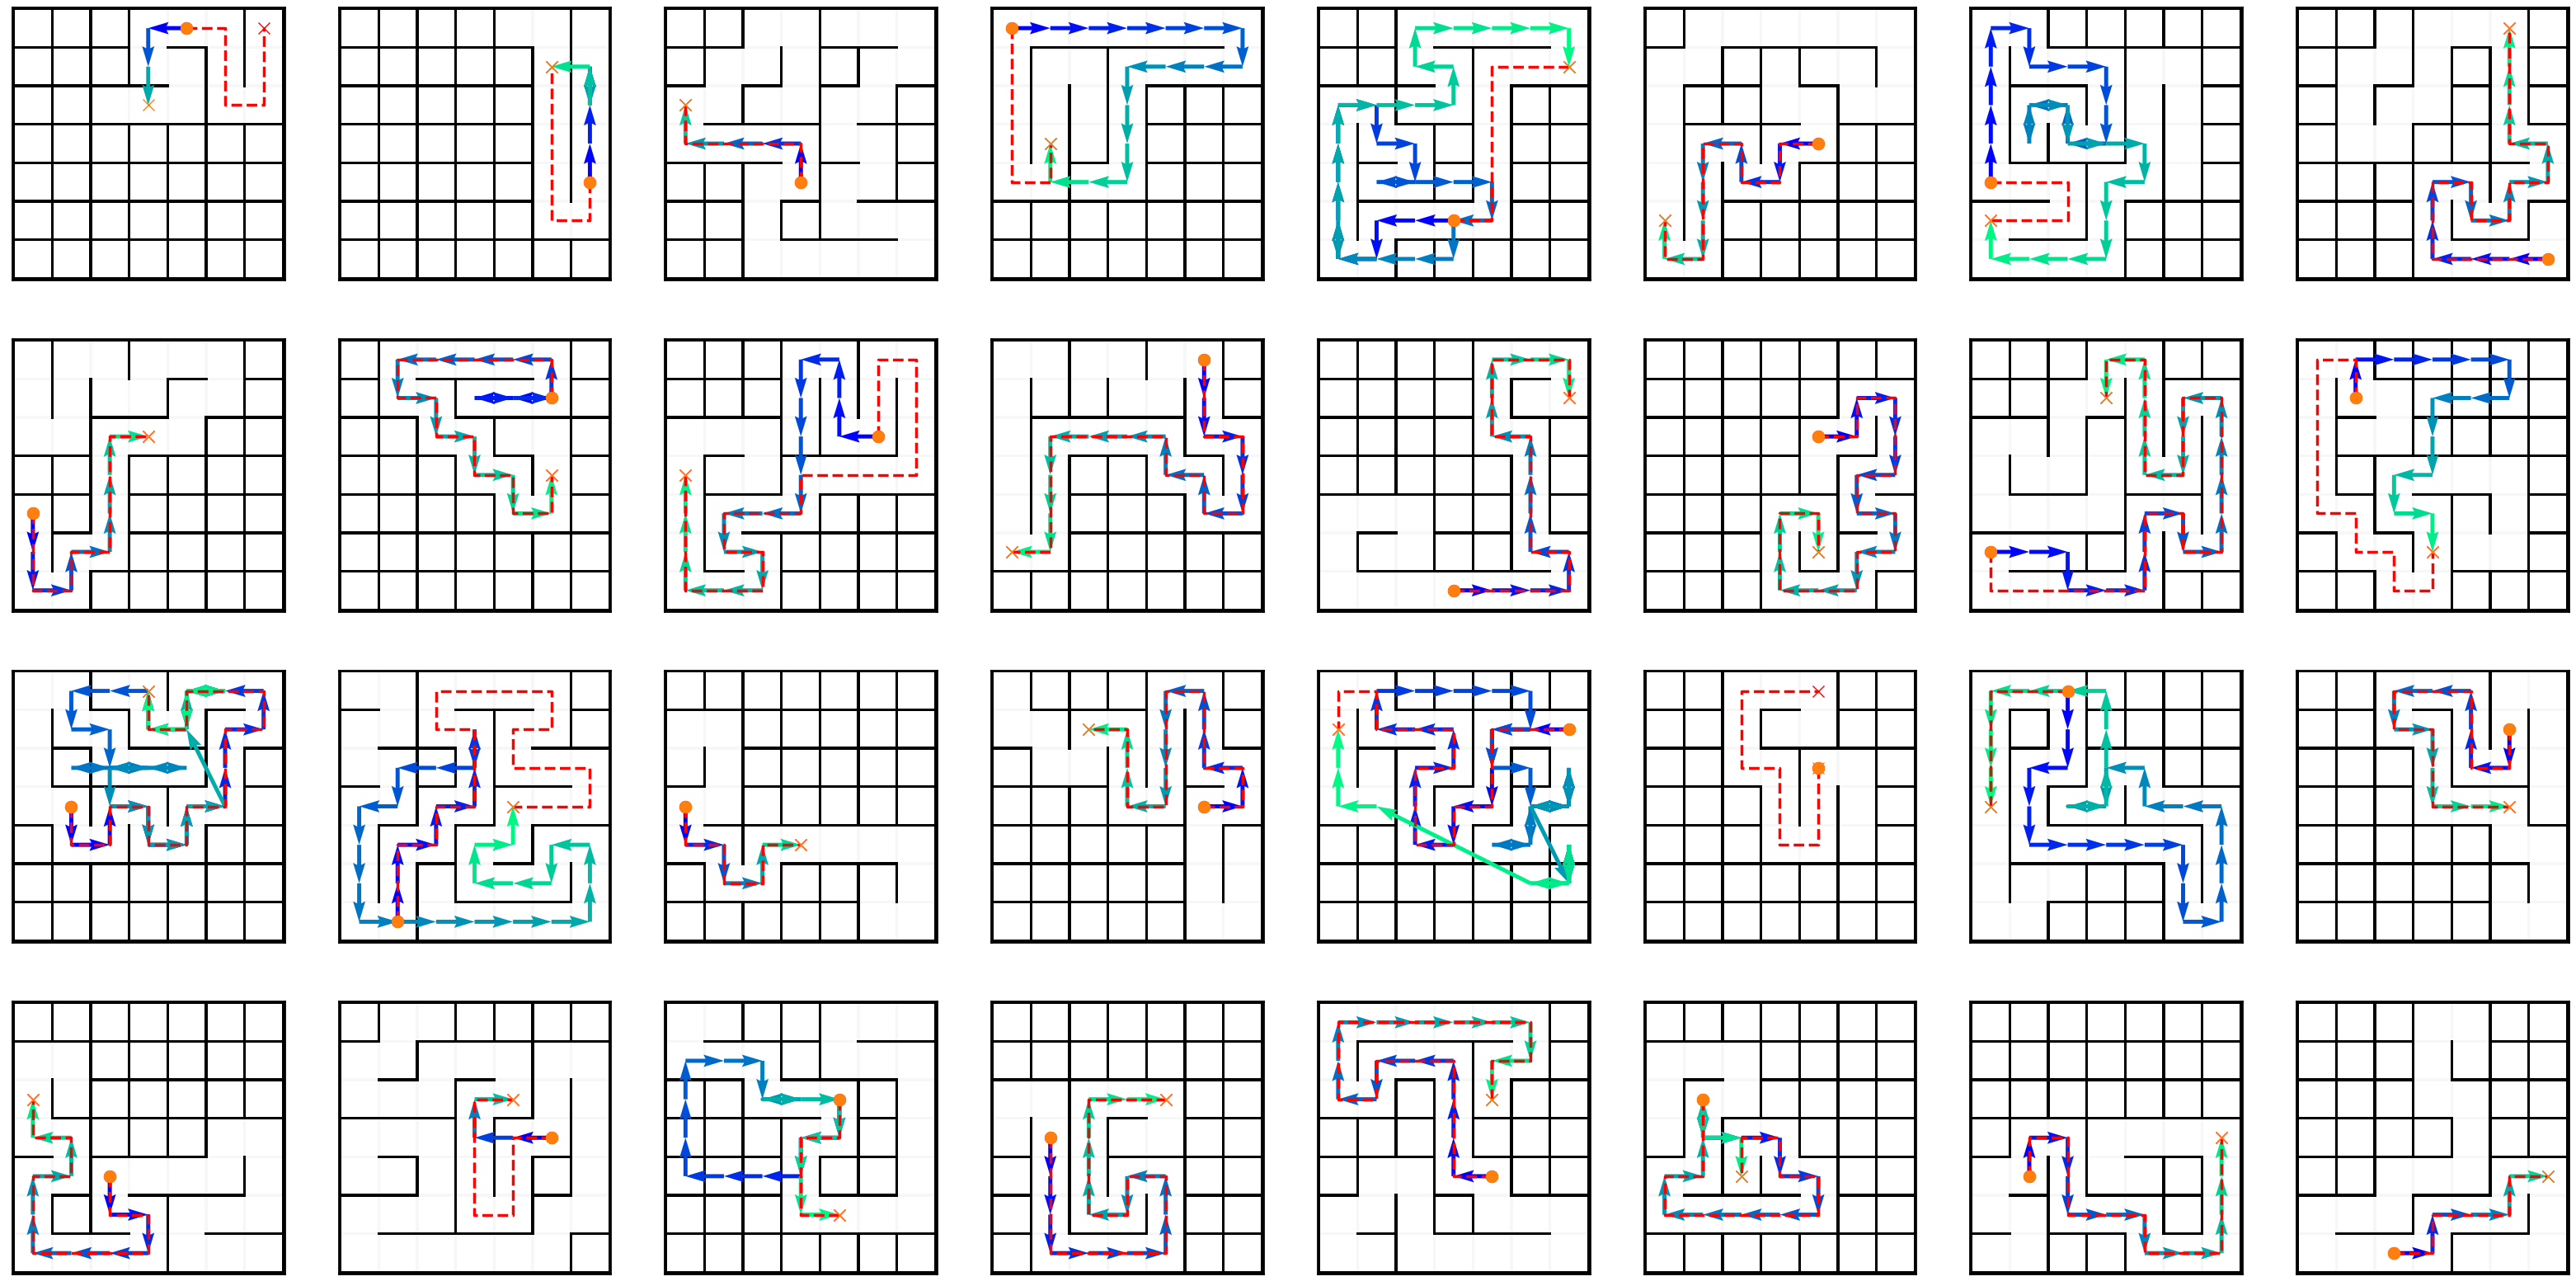

In [4]:
fig, ax = plot_predicted_paths(
	MODEL, 
	DATASET, 
	n_mazes=32,
	max_new_tokens=50, 
	row_length=8, 
	figsize_scale=5,
	predicted_path_fmt=PathFormat(cmap="winter"),
	show=False,
	print_generations=False,
)
# fig.suptitle(f"Predicted Paths\nmode: {MODEL.config.name}\ndataset: {DATASET.cfg.to_fname()}", fontsize=20)
# make the figure taller
# fig.set_figheight(fig.get_figheight() + 1)
# plt.savefig(f"rollouts-{MODEL.config.name}.pdf", bbox_inches="tight")
plt.show()

